In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [2]:
batch_size = 100
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}
data_dir = '/input'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train']}

In [14]:
class ConvNet_L6_A(nn.Module):
    def __init__(self):
        super(ConvNet_L6_A, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [15]:
class ConvNet_L6_B(nn.Module):
    def __init__(self):
        super(ConvNet_L6_B, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [16]:
class ConvNet_L6_C(nn.Module):
    def __init__(self):
        super(ConvNet_L6_C, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,512)
        self.fc2 = nn.Linear(512,100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [17]:
class ConvNet_L6_D(nn.Module):
    def __init__(self):
        super(ConvNet_L6_D, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,4000)
        self.fc2 = nn.Linear(4000,2048)
        self.fc3 = nn.Linear(2048, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [18]:
class ConvNet_L6_E(nn.Module):
    def __init__(self):
        super(ConvNet_L6_E, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [19]:
class ConvNet_L6_F(nn.Module):
    def __init__(self):
        super(ConvNet_L6_F, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x= self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [20]:
class ConvNet_L6_G(nn.Module):
    def __init__(self):
        super(ConvNet_L6_G, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)

        return F.log_softmax(x, dim = 1)

In [21]:
class ConvNet_L6_H(nn.Module):
    def __init__(self):
        super(ConvNet_L6_H, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,512)
        self.fc2 = nn.Linear(512,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [22]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    print('accuracy on this tset: {}%'.format(100*float(count)/float(batch_size*len(dataset))),count)

In [23]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 15):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.all_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))

In [24]:
model_l6_a = ConvNet_L6_A()
model_l6_a.cuda()
model_l6_b = ConvNet_L6_B()
model_l6_b.cuda()
model_l6_c = ConvNet_L6_C()
model_l6_c.cuda()
model_l6_d = ConvNet_L6_D()
model_l6_d.cuda()
model_l6_e = ConvNet_L6_E()
model_l6_e.cuda()
model_l6_f = ConvNet_L6_F()
model_l6_f.cuda()
model_l6_g = ConvNet_L6_G()
model_l6_g.cuda()
model_l6_h = ConvNet_L6_H()
model_l6_h.cuda()

AssertionError: Torch not compiled with CUDA enabled

In [71]:
start_time = time.time()
train = Training(dataloaders, model_l6_a,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_a, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606813	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.602591	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.609056	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.615942	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.613131	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.604012	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.606150	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.607471	Accuracy: 0.030
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.605772	Accuracy: 0.030
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.609201	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.595125	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.617606	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.595218	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.603771	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.249869	Accuracy: 0.720
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.225531	Accuracy: 0.670
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.869515	Accuracy: 0.820
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.722400	Accuracy: 0.780
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.875882	Accuracy: 0.750
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.574959	Accuracy: 0.850
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 1.080022	Accuracy: 0.720
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.801621	Accuracy: 0.780
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.740207	Accuracy: 0.780
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.982424	Accuracy: 0.730
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.843389	Accuracy: 0.780
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.828233	Accuracy: 0.800
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.889592	Accuracy: 0.750
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.570501	Accuracy: 0.840
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.235564	Accuracy: 0.930
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.402715	Accuracy: 0.850
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.261104	Accuracy: 0.940
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.326205	Accuracy: 0.910
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.146946	Accuracy: 0.960
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.081357	Accuracy: 0.990
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.123075	Accuracy: 0.940
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.111775	Accuracy: 0.970
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.106389	Accuracy: 0.960
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.115810	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.080783	Accuracy: 0.990
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.255407	Accuracy: 0.910
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.187386	Accuracy: 0.940
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.044668	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.060785	Accuracy: 0.980
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.207565	Accuracy: 0.960
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.056478	Accuracy: 0.970
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.069365	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.074892	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.155875	Accuracy: 0.970
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.008460	Accuracy: 1.000
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.067508	Accuracy: 0.980
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.077879	Accuracy: 0.970
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.014150	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.104394	Accuracy: 0.970
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.041275	Accuracy: 0.980
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.069423	Accuracy: 0.970
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.092343	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

In [83]:
start_time = time.time()
train = Training(dataloaders, model_l6_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_b, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.608090	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.605978	Accuracy: 0.030
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.606459	Accuracy: 0.000
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.605820	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604454	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.606170	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.605041	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.604658	Accuracy: 0.000
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.607106	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.605210	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.602833	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.607271	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.603661	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.609399	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.998825	Accuracy: 0.770
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.298002	Accuracy: 0.670
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.873357	Accuracy: 0.820
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.855643	Accuracy: 0.790
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.812855	Accuracy: 0.770
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.858422	Accuracy: 0.750
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.885929	Accuracy: 0.730
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.858583	Accuracy: 0.760
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 1.096636	Accuracy: 0.730
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.604013	Accuracy: 0.790
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 1.075513	Accuracy: 0.740
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.801086	Accuracy: 0.770
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.940437	Accuracy: 0.770
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.742909	Accuracy: 0.790
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.333331	Accuracy: 0.930
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.236783	Accuracy: 0.920
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.390510	Accuracy: 0.890
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.315929	Accuracy: 0.920
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.202607	Accuracy: 0.950
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.091830	Accuracy: 0.950
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.085897	Accuracy: 0.980
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.098483	Accuracy: 0.960
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.144979	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.092787	Accuracy: 0.980
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.134536	Accuracy: 0.960
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.171096	Accuracy: 0.960
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.159794	Accuracy: 0.950
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.116276	Accuracy: 0.970
Train Epoch: 6 [10000/40000 (25.000%)

In [86]:
start_time = time.time()
train = Training(dataloaders, model_l6_c,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_c, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606719	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.607838	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.605924	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.606379	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604686	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.607509	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.604425	Accuracy: 0.000
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.605340	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.605596	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.604040	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.606996	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.610078	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.604823	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.606499	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 3.604127	Accuracy: 0.150
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 3.810459	Accuracy: 0.100
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 3.520695	Accuracy: 0.170
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 3.411899	Accuracy: 0.200
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 3.687166	Accuracy: 0.100
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 3.709624	Accuracy: 0.130
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 3.126456	Accuracy: 0.220
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 3.725849	Accuracy: 0.140
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 3.248808	Accuracy: 0.240
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 3.626425	Accuracy: 0.140
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 3.092971	Accuracy: 0.260
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 3.117641	Accuracy: 0.250
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 3.466306	Accuracy: 0.220
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 3.091429	Accuracy: 0.270
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.761772	Accuracy: 0.780
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.690055	Accuracy: 0.810
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.901741	Accuracy: 0.760
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.679626	Accuracy: 0.820
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.322071	Accuracy: 0.910
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.453282	Accuracy: 0.860
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.514557	Accuracy: 0.890
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.546563	Accuracy: 0.880
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.433188	Accuracy: 0.880
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.622536	Accuracy: 0.800
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.636387	Accuracy: 0.820
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.618078	Accuracy: 0.850
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.527986	Accuracy: 0.860
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.650084	Accuracy: 0.810
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.175623	Accuracy: 0.960
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.289479	Accuracy: 0.920
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.142090	Accuracy: 0.960
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.233148	Accuracy: 0.930
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.367744	Accuracy: 0.920
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.205181	Accuracy: 0.930
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.102234	Accuracy: 0.980
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.133114	Accuracy: 0.960
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.140120	Accuracy: 0.950
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.084876	Accuracy: 0.980
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.109369	Accuracy: 0.950
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.144444	Accuracy: 0.930
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.091456	Accuracy: 0.970
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.206782	Accuracy: 0.960
Train Epoch: 9 [8000/40000 (20.000%

In [89]:
start_time = time.time()
train = Training(dataloaders, model_l6_d, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_d, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.612371	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.610752	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.600473	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.607250	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.612160	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.597711	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.597670	Accuracy: 0.030
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.606896	Accuracy: 0.000
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.598133	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.597225	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.605535	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.595763	Accuracy: 0.020
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.571815	Accuracy: 0.040
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.576440	Accuracy: 0.020
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.003608	Accuracy: 0.730
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.103310	Accuracy: 0.750
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.478793	Accuracy: 0.890
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.335841	Accuracy: 0.910
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.473595	Accuracy: 0.880
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.503447	Accuracy: 0.860
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.581245	Accuracy: 0.850
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.394289	Accuracy: 0.860
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.458387	Accuracy: 0.890
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.339919	Accuracy: 0.900
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.455724	Accuracy: 0.890
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.431503	Accuracy: 0.850
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.445615	Accuracy: 0.890
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.466873	Accuracy: 0.900
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.116904	Accuracy: 0.950
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.301365	Accuracy: 0.920
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.160026	Accuracy: 0.940
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.095809	Accuracy: 0.970
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.083446	Accuracy: 0.980
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.076961	Accuracy: 0.980
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.124919	Accuracy: 0.950
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.166710	Accuracy: 0.930
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.079737	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.154524	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.102652	Accuracy: 0.970
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.049497	Accuracy: 0.980
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.109005	Accuracy: 0.970
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.065826	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.090623	Accuracy: 0.970
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.012164	Accuracy: 1.000
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.039318	Accuracy: 0.990
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.072143	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.038833	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.092700	Accuracy: 0.960
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.003428	Accuracy: 1.000
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.330651	Accuracy: 0.950
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.003624	Accuracy: 1.000
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.015638	Accuracy: 1.000
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.041184	Accuracy: 0.980
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.012433	Accuracy: 0.990
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.041835	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.030581	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

In [92]:
start_time = time.time()
train = Training(dataloaders, model_l6_e, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_e, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.603861	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.599338	Accuracy: 0.020
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.607983	Accuracy: 0.020
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.602911	Accuracy: 0.030
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604300	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.600961	Accuracy: 0.020
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.611467	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.606128	Accuracy: 0.050
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.596281	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.609079	Accuracy: 0.020
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.601803	Accuracy: 0.010
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.601233	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.595404	Accuracy: 0.000
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.593409	Accuracy: 0.030
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.871001	Accuracy: 0.780
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.196116	Accuracy: 0.710
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.863848	Accuracy: 0.760
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.699335	Accuracy: 0.840
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.739909	Accuracy: 0.790
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.809297	Accuracy: 0.800
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.799205	Accuracy: 0.790
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.639867	Accuracy: 0.840
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.443304	Accuracy: 0.890
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.664556	Accuracy: 0.840
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.548290	Accuracy: 0.860
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.729731	Accuracy: 0.820
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.588688	Accuracy: 0.820
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.759717	Accuracy: 0.800
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.118457	Accuracy: 0.980
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.364758	Accuracy: 0.900
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.228920	Accuracy: 0.910
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.237158	Accuracy: 0.910
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.082690	Accuracy: 0.990
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.149436	Accuracy: 0.960
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.090729	Accuracy: 0.970
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.075255	Accuracy: 0.980
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.165576	Accuracy: 0.930
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.097474	Accuracy: 0.970
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.095791	Accuracy: 0.960
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.303137	Accuracy: 0.940
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.114643	Accuracy: 0.960
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.053271	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.025475	Accuracy: 1.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.066306	Accuracy: 0.970
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.069354	Accuracy: 0.970
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.058480	Accuracy: 0.970
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.047174	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.082900	Accuracy: 0.970
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.051112	Accuracy: 0.980
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.013024	Accuracy: 1.000
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.069737	Accuracy: 0.960
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.025223	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.040696	Accuracy: 0.970
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.072381	Accuracy: 0.990
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.013064	Accuracy: 1.000
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.022710	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

In [95]:
start_time = time.time()
train = Training(dataloaders, model_l6_f, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_f, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606895	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.608979	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.606612	Accuracy: 0.020
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.601694	Accuracy: 0.020
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.600976	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.600134	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.603187	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.594341	Accuracy: 0.040
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.599654	Accuracy: 0.030
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.600577	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.605949	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.601491	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.600416	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.612823	Accuracy: 0.000
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.179629	Accuracy: 0.740
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.619129	Accuracy: 0.650
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 1.036878	Accuracy: 0.720
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 1.143702	Accuracy: 0.720
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.989004	Accuracy: 0.760
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 1.196297	Accuracy: 0.720
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 1.113588	Accuracy: 0.700
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 1.244419	Accuracy: 0.720
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.897518	Accuracy: 0.740
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 1.119718	Accuracy: 0.720
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.871437	Accuracy: 0.780
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 1.235230	Accuracy: 0.660
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.971250	Accuracy: 0.720
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 1.030601	Accuracy: 0.710
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.155581	Accuracy: 0.950
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.280115	Accuracy: 0.940
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.557678	Accuracy: 0.850
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.279456	Accuracy: 0.890
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.100880	Accuracy: 0.970
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.092779	Accuracy: 0.990
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.071855	Accuracy: 0.980
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.171738	Accuracy: 0.940
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.100555	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.115099	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.182084	Accuracy: 0.950
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.141921	Accuracy: 0.960
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.105131	Accuracy: 0.970
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.204280	Accuracy: 0.940
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.132671	Accuracy: 0.960
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.040727	Accuracy: 0.990
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.075833	Accuracy: 0.980
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.055841	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.105060	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.063592	Accuracy: 0.980
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.023164	Accuracy: 0.990
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.098143	Accuracy: 0.990
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.053920	Accuracy: 0.970
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.041280	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.167247	Accuracy: 0.960
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.137023	Accuracy: 0.970
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.041914	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.023583	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_g, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_g, dataloaders['test'])

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_h, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_h, dataloaders['test'])

## visualize results

plot losses

NameError: name 'model_l6_b' is not defined

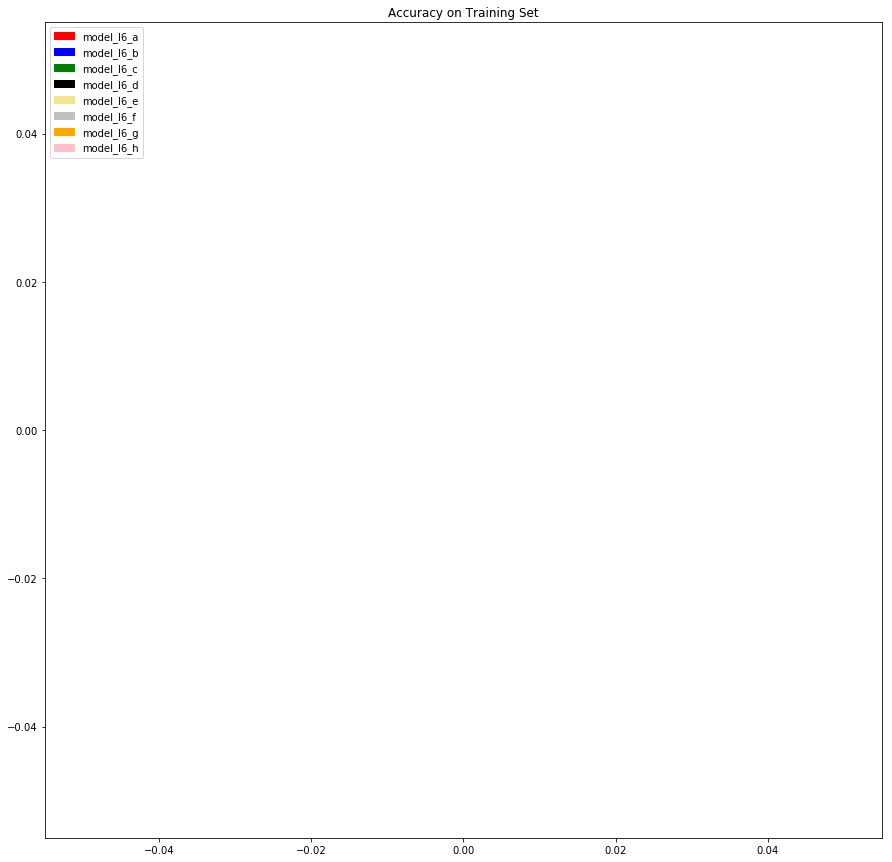

In [25]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
black_patch = mpatches.Patch(color='black', label='model_l6_d')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_e')
silver_patch = mpatches.Patch(color='silver', label='model_l6_f')
orange_patch = mpatches.Patch(color='orange', label='model_l6_g')
pink_patch = mpatches.Patch(color='pink', label='model_l6_h')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6_a.all_accuracy, 'red')
plt.plot(model_l6_b.all_accuracy, 'blue')
plt.plot(model_l6_c.all_accuracy, 'green')
plt.plot(model_l6_d.all_accuracy, 'black')
plt.plot(model_l6_e.all_accuracy, 'khaki')
plt.plot(model_l6_f.all_accuracy, 'silver')
plt.plot(model_l6_g.all_accuracy, 'orange')
plt.plot(model_l6_h.all_accuracy, 'pink')

plt.show()

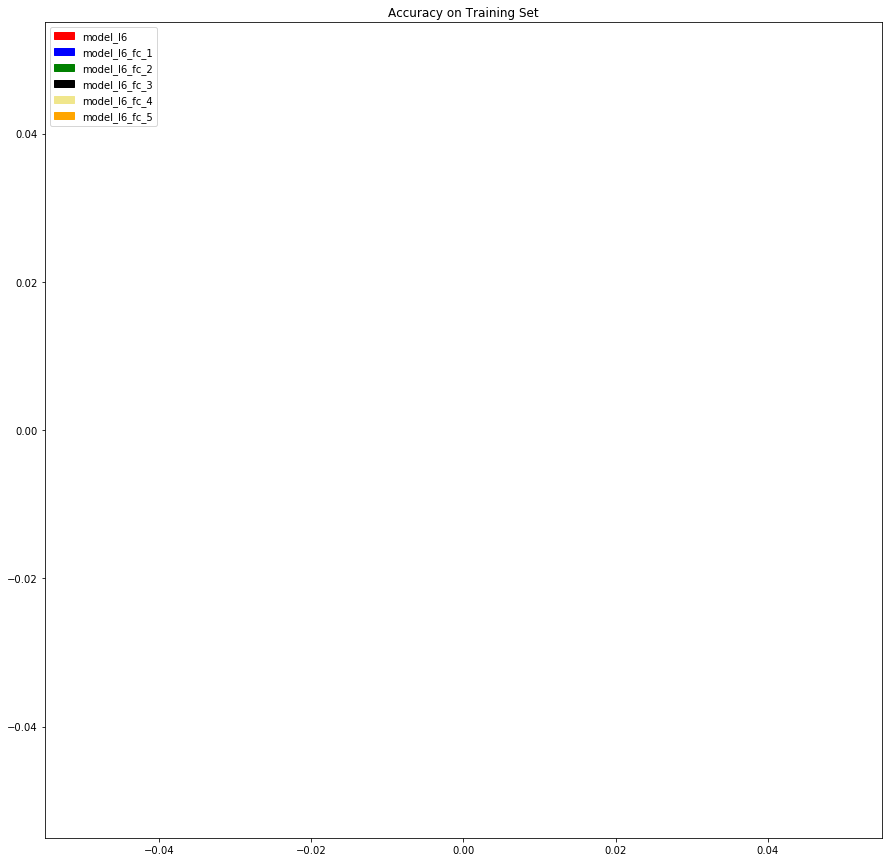

In [13]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
black_patch = mpatches.Patch(color='black', label='model_l6_d')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_e')
silver_patch = mpatches.Patch(color='silver', label='model_l6_f')
orange_patch = mpatches.Patch(color='orange', label='model_l6_g')
pink_patch = mpatches.Patch(color='pink', label='model_l6_h')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6_a.all_accuracy, 'red')
plt.plot(model_l6_b.all_accuracy, 'blue')
plt.plot(model_l6_c.all_accuracy, 'green')
plt.plot(model_l6_d.all_accuracy, 'black')
plt.plot(model_l6_e.all_accuracy, 'khaki')
plt.plot(model_l6_f.all_accuracy, 'silver')
plt.plot(model_l6_g.all_accuracy, 'orange')
plt.plot(model_l6_h.all_accuracy, 'pink')

plt.show()